### Data Analysis

In [99]:
# import all the libraries needed for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
%matplotlib inline

In [101]:
plt.style.use('ggplot')

In [161]:
from selenium import webdriver
driver = webdriver.Chrome()
driver.get("https://geographic.org/streetview/usa/ny/queens/index.html")

In [170]:
x = [el.text for el in driver.find_elements_by_xpath('//span[@class="listspan"]')]
x = x[0].lower().split('\n')
x

['arverne',
 'astoria',
 'bayside',
 'bellerose',
 'breezy point',
 'cambria heights',
 'college point',
 'corona',
 'east elmhurst',
 'elmhurst',
 'far rockaway',
 'floral park',
 'flushing',
 'forest hills',
 'fresh meadows',
 'glen oaks',
 'hollis',
 'howard beach',
 'jackson heights',
 'jamaica',
 'kew gardens',
 'little neck',
 'long island city',
 'maspeth',
 'middle village',
 'oakland gardens',
 'ozone park',
 'queens village',
 'rego park',
 'richmond hill',
 'ridgewood',
 'rockaway park',
 'rosedale',
 'saint albans',
 'south ozone park',
 'south richmond hill',
 'springfield gardens',
 'sunnyside',
 'whitestone',
 'woodhaven',
 'woodside']

In [148]:
# this data has duplications because of language seperated and added as rows
df = pd.read_csv('zocdocnyc_cleaned.csv', index_col = 0) 
df

,Level,Specialties,Gender,Language,Video_Visit,City,Zipcode,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score,Doc_Urls
Name,,,,,,,,,,,,
"Dr. Rita Aronov, MD",0,Pediatric Doctors,Female,English,False,Brooklyn,11201.0,88.0,4.97,4.67,5.00,https://www.zocdoc.com/doctor/rita-aronov-md-5...
"Dr. Rita Aronov, MD",1,Pediatric Doctors,Female,Russian,False,Brooklyn,11201.0,88.0,4.97,4.67,5.00,https://www.zocdoc.com/doctor/rita-aronov-md-5...
"Dr. Tamir Danilov, DPM",0,Podiatrist,Male,English,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
"Dr. Tamir Danilov, DPM",1,Podiatrist,Male,Spanish,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
"Dr. Tamir Danilov, DPM",2,Podiatrist,Male,Russian,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...
...,...,...,...,...,...,...,...,...,...,...,...,...
"Dr. David Berkower, DDS",0,Dentist,Male,English,False,New York,10128.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/dentist/david-berkower-...
"Dr. David Berkower, DDS",1,Dentist,Male,Spanish,False,New York,10128.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/dentist/david-berkower-...
"Dr. Yekaterina Kuznetsova, DO",0,General Doctor,Female,English,True,New York,10016.0,1507.0,4.33,4.01,4.38,https://www.zocdoc.com/doctor/yekaterina-kuzne...


In [104]:
# def f(row):
#     if row['Zipcode'] >= 10001 or row['Zipcode'] <= 10280:
#         val = 'Manhattan'
#     elif row['Zipcode'] >= 10301 or row['Zipcode'] <= 10314:
#         val = 'Staten Island'
#     elif row['Zipcode'] >= 10451 or row['Zipcode'] <= 10475:
#         val = 'Bronx'
#     elif row['Zipcode'] in [11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219, \
#                             11230, 11234, 11236, 11239, 11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231, \
#                            11203, 11210, 11225, 11226, 11207, 11208, 11211, 11222, 11220, 11232, 11206, 11221, 11237]:
#         val = 'Brooklyn'
#     elif row['Zipcode'] >= 11101 or row['Zipcode'] <= 11697:
#         val = 'Queens'
#     else:
#         val = np.nan
#     return val
    
# df['Borough'] = df.apply(f, axis=1)

In [144]:
def f(row):
    
    if row >= 10001 or row <= 10280:
        return 'Manhattan'
    
    elif row >= 10301 or row <= 10314:
        return 'Staten Island'
        
    elif row >= 10451 or row <= 10475:
        return 'Bronx'
        
    elif row >= 11201 or row <= 11239:
        return 'Brooklyn'
        
    elif row >= 11101 or row <= 11697:
        return 'Queens'
    else:
        return np.nan
    
df['Borough'] = df.Zipcode.apply(f)

In [157]:
df.City = df.City.str.lower()
df.City = df.City.replace('11242', np.nan)
df.City = df.City.replace('828-367-7316', np.nan)

In [171]:
def queens(value):
    global x,y
    if value in x:
        return 'Queens'
    
    
df['Borough'] = df['City'].apply(queens)

In [173]:
set(df['Borough'])

{None, 'Queens'}

In [146]:
df0 = df.loc[df['Level'] == 0] # only picked the first row for every level

In [147]:
set(df0.Borough)

{'Manhattan', nan}

In [107]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, Dr. Rita Aronov, MD to Rachel Freed, PhD
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Level            4000 non-null   int64  
 1   Specialties      4000 non-null   object 
 2   Gender           4000 non-null   object 
 3   Language         3972 non-null   object 
 4   Video_Visit      4000 non-null   bool   
 5   City             4000 non-null   object 
 6   Zipcode          3520 non-null   float64
 7   Total_Reviews    3292 non-null   float64
 8   Overall_Ratings  3567 non-null   float64
 9   Wait_Time_Score  3541 non-null   float64
 10  Manner_Score     3541 non-null   float64
 11  Doc_Urls         4000 non-null   object 
 12  Borough          3520 non-null   object 
dtypes: bool(1), float64(5), int64(1), object(6)
memory usage: 410.2+ KB


In [108]:
# check which rows has at least one nan values

#df[df.isna().any(axis = 1)]

In [109]:
set(df0.Zipcode)

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10270.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10279.0,
 10280.0,
 10301.0,
 10302.0,
 10303.0,
 10304.0,
 10305.0,
 10306.0,
 10309.0,
 10310.0,
 10312.0,
 10314.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 11021.0,
 28801.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 7013.0,
 10451.0,
 10452.0,
 10454.0,
 10455.0,
 10457.0,
 10458.0,
 10459.0,
 10460.0,
 10461.0,
 10462.0,
 10463.0,
 10465.0,
 10466.0,
 10467.0,
 10468.0,
 10469.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 10475.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10502.0,
 10504.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 10510.0,
 nan,
 nan,
 nan,

In [110]:
df0[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].describe()

,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score
count,3292.000000,3567.000000,3541.000000,3541.000000
mean,189.780984,4.789294,4.552474,4.819226
std,389.013932,0.294904,0.426937,0.253093
min,1.000000,1.000000,1.000000,1.000000
25%,15.000000,4.710000,4.330000,4.750000
50%,61.000000,4.870000,4.670000,4.900000
75%,194.250000,5.000000,4.880000,5.000000
max,6804.000000,5.000000,5.000000,5.000000


In [111]:
# Correlation between the values
pd.DataFrame(df0[['Video_Visit', 'Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']].\
             corr().unstack().sort_values(ascending = False))

0
Manner_Score    Manner_Score     1.000000
Wait_Time_Score Wait_Time_Score  1.000000
Total_Reviews   Total_Reviews    1.000000
Overall_Ratings Overall_Ratings  1.000000
Video_Visit     Video_Visit      1.000000
Manner_Score    Overall_Ratings  0.883788
Overall_Ratings Manner_Score     0.883788
Manner_Score    Wait_Time_Score  0.543766
Wait_Time_Score Manner_Score     0.543766
                Overall_Ratings  0.534944
Overall_Ratings Wait_Time_Score  0.534944
Video_Visit     Wait_Time_Score  0.098053
Wait_Time_Score Video_Visit      0.098053
Video_Visit     Total_Reviews    0.066225
Total_Reviews   Video_Visit      0.066225
Video_Visit     Manner_Score     0.059573
Manner_Score    Video_Visit      0.059573
Video_Visit     Overall_Ratings  0.059087
Overall_Ratings Video_Visit      0.059087
Total_Reviews   Overall_Ratings -0.088337
Overall_Ratings Total_Reviews   -0.088337
Total_Reviews   Manner_Score    -0.089450
Manner_Score    Total_Reviews   -0.089450
Total_Reviews   Wait_Time_Score -0.120748
Wait_Time_Score Total_Reviews   -0.120748

In [112]:
fig1 = pd.DataFrame(df0.Gender.value_counts())
fig1

,Gender
Male,2092
Female,1908


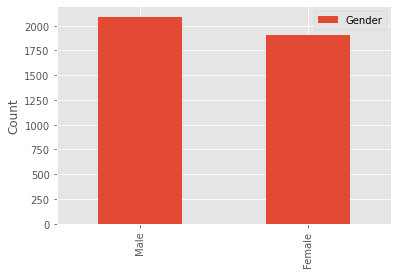

In [113]:
fig1.plot.bar()
plt.ylabel('Count')
plt.show()

In [114]:
fig2 = pd.DataFrame(df0.Specialties.value_counts())


Text(0, 0.5, 'Count')

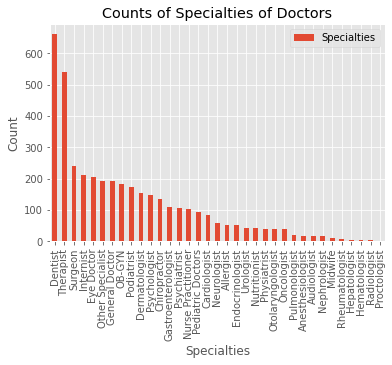

In [115]:
fig2.plot.bar()
plt.title("Counts of Specialties of Doctors")
plt.xlabel('Specialties')
plt.ylabel('Count')

In [116]:
fig3 = pd.DataFrame(df.Language.value_counts())
#fig3[fig3['Language'] >= 8].drop(index = 'English')

## Languages with value 1 : ['Danish', 'Lithuanian', 'Tibetan', 'Kashmiri', 'American Sign Language',
#        'Xhosa', 'Romani', 'Afrikaans', 'Nepali', 'Amharic', 'Mongolian',
#        'Hausa', 'Norwegian', 'Latvian', 'Tajik', 'Bosnian', 'Yoruba', 'Zulu',
#        'Czech', 'Pashto', 'Assamese', 'Azerbaijani', 'Hiligaynon']


# English = 3972

In [117]:
#fig3[fig3['Language'] < 10]

<Figure size 864x432 with 0 Axes>

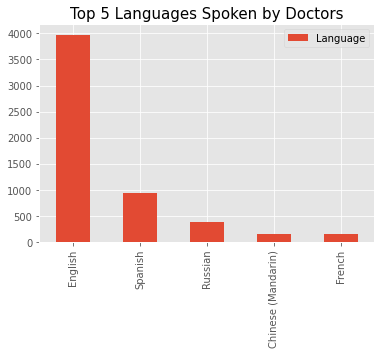

In [118]:
plt.figure(figsize=(12,6))
fig3[fig3['Language'] >= 150].plot.bar().set_title('Top 5 Languages Spoken by Doctors', fontsize = 15)
plt.show()

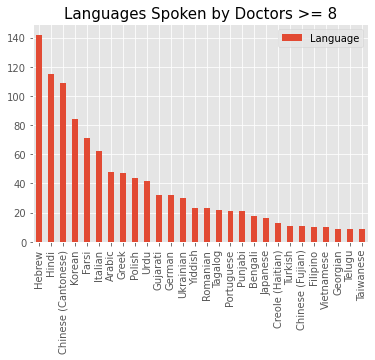

In [119]:
fig3[(fig3['Language'] < 150 ) & (fig3['Language'] >= 8)].plot.bar().set_title('Languages Spoken by Doctors >= 8', fontsize = 15)
plt.show()

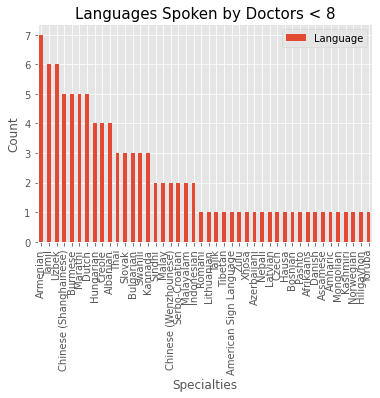

In [120]:
fig3[fig3['Language'] < 8].plot.bar().set_title('Languages Spoken by Doctors < 8', fontsize = 15)
plt.xlabel('Specialties')
plt.ylabel('Count')
plt.show()

In [121]:
fig4 = df0[['Specialties', 'Total_Reviews']].groupby('Specialties').sum().sort_values(by = 'Total_Reviews', ascending=False)

<Figure size 720x432 with 0 Axes>

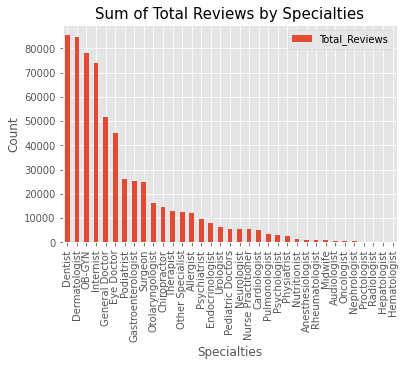

In [122]:
plt.figure(figsize=(10,6))
fig4.plot.bar().set_title('Sum of Total Reviews by Specialties', fontsize=15)
plt.xlabel('Specialties')
plt.ylabel('Count')
plt.show()

/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/suborna/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 7.000e+00, 4.700e+01,
        1.570e+02, 3.970e+02, 9.230e+02, 2.002e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

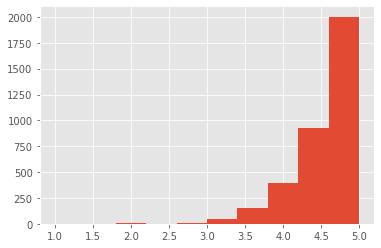

In [123]:
plt.hist(df0.Wait_Time_Score)

(array([1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 7.000e+00,
        1.200e+01, 6.700e+01, 3.530e+02, 3.097e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

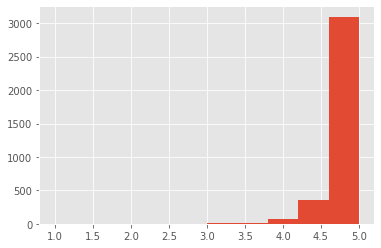

In [124]:
plt.hist(df0.Manner_Score)

(array([5.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 9.000e+00,
        1.500e+01, 1.000e+02, 4.110e+02, 3.025e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

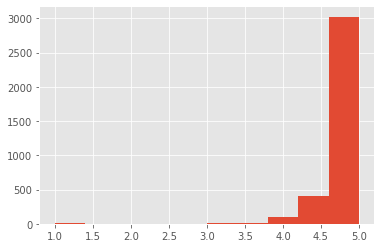

In [125]:
plt.hist(df0.Overall_Ratings)

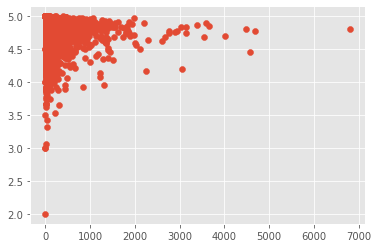

In [126]:
plt.scatter(df0.Total_Reviews, df0.Overall_Ratings)

In [127]:
#df0[['Total_Reviews', 'Overall_Ratings', 'Wait_Time_Score', 'Manner_Score']]

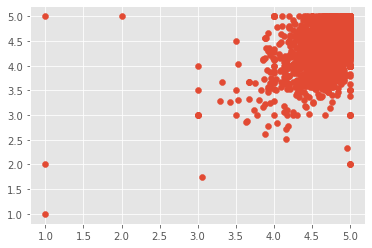

In [128]:
plt.scatter(df0.Overall_Ratings, df0.Wait_Time_Score)

In [129]:
sub = pd.DataFrame(df0.Specialties).set_index(df0.Borough)
sub

,Specialties
Borough,
Manhattan,Pediatric Doctors
Manhattan,Podiatrist
Manhattan,Dentist
NaN,Pediatric Doctors
Manhattan,OB-GYN
...,...
Manhattan,Psychologist
Manhattan,Psychologist
Manhattan,Dentist


In [130]:
df0.loc[df0['Borough'] == 'Manhattan']

,Level,Specialties,Gender,Language,Video_Visit,City,Zipcode,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score,Doc_Urls,Borough
Name,,,,,,,,,,,,,
"Dr. Rita Aronov, MD",0,Pediatric Doctors,Female,English,False,Brooklyn,11201.0,88.0,4.97,4.67,5.00,https://www.zocdoc.com/doctor/rita-aronov-md-5...,Manhattan
"Dr. Tamir Danilov, DPM",0,Podiatrist,Male,English,False,New York,10002.0,148.0,4.89,4.53,4.90,https://www.zocdoc.com/doctor/tamir-danilov-dp...,Manhattan
"Dr. Demetrios Mihalos, DDS",0,Dentist,Male,English,False,New York,10065.0,400.0,4.93,4.79,4.94,https://www.zocdoc.com/dentist/demetrios-mihal...,Manhattan
"Dr. Irina Mikheyeva, DO",0,OB-GYN,Female,English,True,Brooklyn,11223.0,261.0,4.25,3.07,4.40,https://www.zocdoc.com/doctor/irina-mikheyeva-...,Manhattan
"Dr. Raja Aghabi, DDS",0,Dentist,Female,English,False,Valley Stream,11580.0,70.0,4.81,4.65,4.88,https://www.zocdoc.com/dentist/raja-aghabi-dds...,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sedighe (Sedi) Flugelman, PhD",0,Psychologist,Female,English,True,New York,10022.0,22.0,4.64,5.00,4.73,https://www.zocdoc.com/doctor/sedighe-sedi-flu...,Manhattan
"Melissa Johnson, PsyD",0,Psychologist,Female,English,False,Brooklyn,11238.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/doctor/melissa-johnson-...,Manhattan
"Dr. David Berkower, DDS",0,Dentist,Male,English,False,New York,10128.0,3.0,5.00,5.00,5.00,https://www.zocdoc.com/dentist/david-berkower-...,Manhattan


In [132]:
df0.loc[df0['Borough'] == 'Queens']

,Level,Specialties,Gender,Language,Video_Visit,City,Zipcode,Total_Reviews,Overall_Ratings,Wait_Time_Score,Manner_Score,Doc_Urls,Borough
Name,,,,,,,,,,,,,


In [133]:
set(df.Borough)

{'Manhattan', nan}